In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [2]:
dataset = pd.read_csv("..\\DATA\\hk_ipo_feature_engineered", sep='\t', index_col='code', encoding='utf-8')

In [3]:
print(dataset.shape)

(278, 535)


In [4]:
dataset.head()

,buy_ratio,draw_prob,firstday_performance,hk_portion,ipo_price,one_hand,shares_per_hand,ipo_price_range_ratio,total_value_mid,area_大中華,...,sales_招商(香港),sales_太平基業證券,sales_寶威證券有限公司,sales_中天證券有限公司,sales_中國光大證券(香港)有限公司,sales_中州國際,sales_瑞士信貸,stock_type_紅籌,stock_type_H股,stock_type_其他
code,,,,,,,,,,,,,,,,,,,,,
8465,13.6,1.000,0.0000,0.1000,1.68,1.0,2000.0,0.372881,0.5369,0,...,0,0,0,0,0,0,0,0,0,1
8427,11.2,1.000,1.5000,0.1000,0.28,1.0,8000.0,0.214286,0.1736,0,...,0,0,0,0,0,0,0,0,0,1
1216,0.0,1.000,0.0163,0.0386,2.45,1.0,1000.0,0.044444,8.1675,0,...,0,0,0,0,0,1,0,0,1,0
8291,12.1,0.903,0.0462,0.5000,0.65,2.0,5000.0,0.333333,0.2400,0,...,0,0,0,0,0,0,0,0,0,1
8472,10.5,1.000,0.1000,0.1000,0.50,1.0,5000.0,0.000000,NaN,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 8465 to 699
Columns: 535 entries, buy_ratio to stock_type_其他
dtypes: float64(9), int64(526)
memory usage: 1.1 MB


### Columns 4-10 will be used for training, column 11 is Y

In [6]:
dataset.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

In [7]:
y = dataset['firstday_performance']
X = dataset.drop('firstday_performance', axis = 1)

In [8]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [11]:
xg_reg.fit(X_train,y_train)

[13:46:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10)

In [12]:
preds = xg_reg.predict(X_test)

In [13]:
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.294011


In [14]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [15]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[13:46:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [16]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.457492,0.008969,0.459171,0.019270
1,0.430809,0.008705,0.435386,0.019443
2,0.407083,0.008180,0.414386,0.020413
3,0.386639,0.007738,0.396452,0.020666
4,0.368244,0.008105,0.381123,0.021690


In [17]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.290244
Name: test-rmse-mean, dtype: float64


In [18]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[13:46:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


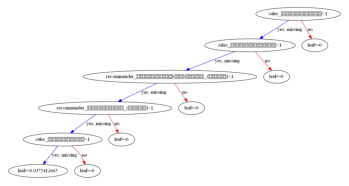

In [19]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

C:\Users\User\anaconda3\envs\xgboost\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\xgboost\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\xgboost\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 34701 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\xgboost\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\xgboost\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\xgboost\lib\site-packages\matplotlib

C:\Users\User\anaconda3\envs\xgboost\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\envs\xgboost\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\envs\xgboost\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\envs\xgboost\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22296 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\envs\xgboost\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21295 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\envs\xgboost\lib\site-packages\matplotlib\backends\

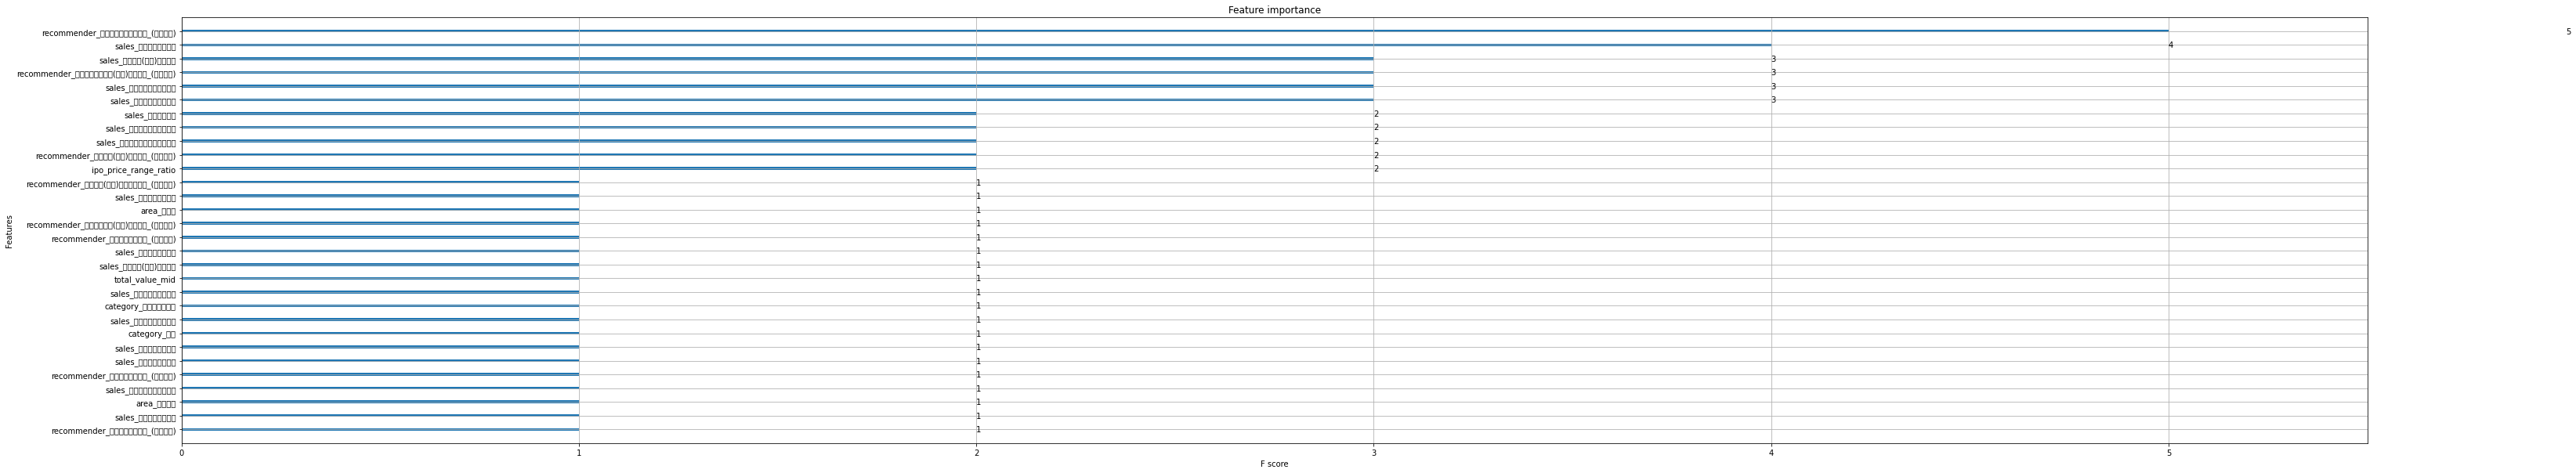

In [20]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()